In [5]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk


In [20]:
headlines=pd.read_csv('india-news-headlines.csv')


In [83]:
stockPrics = pd.read_csv('NVDA.csv')

# Manipulating STOCKS DATA

In [9]:
stockPrics.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,42.998001,43.990002,42.674000,43.807999,43.794888,451153000
1,2023-06-21,43.500999,43.615002,42.080002,43.044998,43.032112,551603000
2,2023-06-22,42.252998,43.425999,42.234001,43.025002,43.012127,417737000
3,2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
4,2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000


In [10]:
stockPrics.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [84]:
stockPrics['Date'] = pd.to_datetime(stockPrics['Date']).dt.normalize()

# setting the column 'Date' as the index column
stockPrics.set_index('Date', inplace=True)

# displaying the stock_data
stockPrics.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-18,3.68750,3.87775,3.67650,3.8220,3.800063,581920000
2019-06-19,3.85750,3.86900,3.80175,3.8280,3.806029,331644000
2019-06-20,3.91925,3.93325,3.83800,3.8525,3.830389,350168000
2019-06-21,3.83750,3.88700,3.78750,3.7940,3.772225,434428000
2019-06-24,3.81550,3.84625,3.76800,3.8165,3.794595,282948000


In [14]:
stockPrics.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,63.292900,64.356382,62.127004,63.349506,63.340214,4.729557e+08
std,23.509133,23.975230,22.940444,23.572260,23.573755,1.492829e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.982090e+08
25%,45.024000,45.898000,44.442502,45.434500,45.420902,3.770505e+08
50%,49.380001,49.716999,48.418999,49.097000,49.090664,4.375930e+08
75%,85.173500,87.665001,83.563000,85.795502,85.788456,5.334405e+08
max,132.990005,133.729996,129.580002,131.880005,131.880005,1.156044e+09


Text(0, 0.5, 'Close Price ($)')

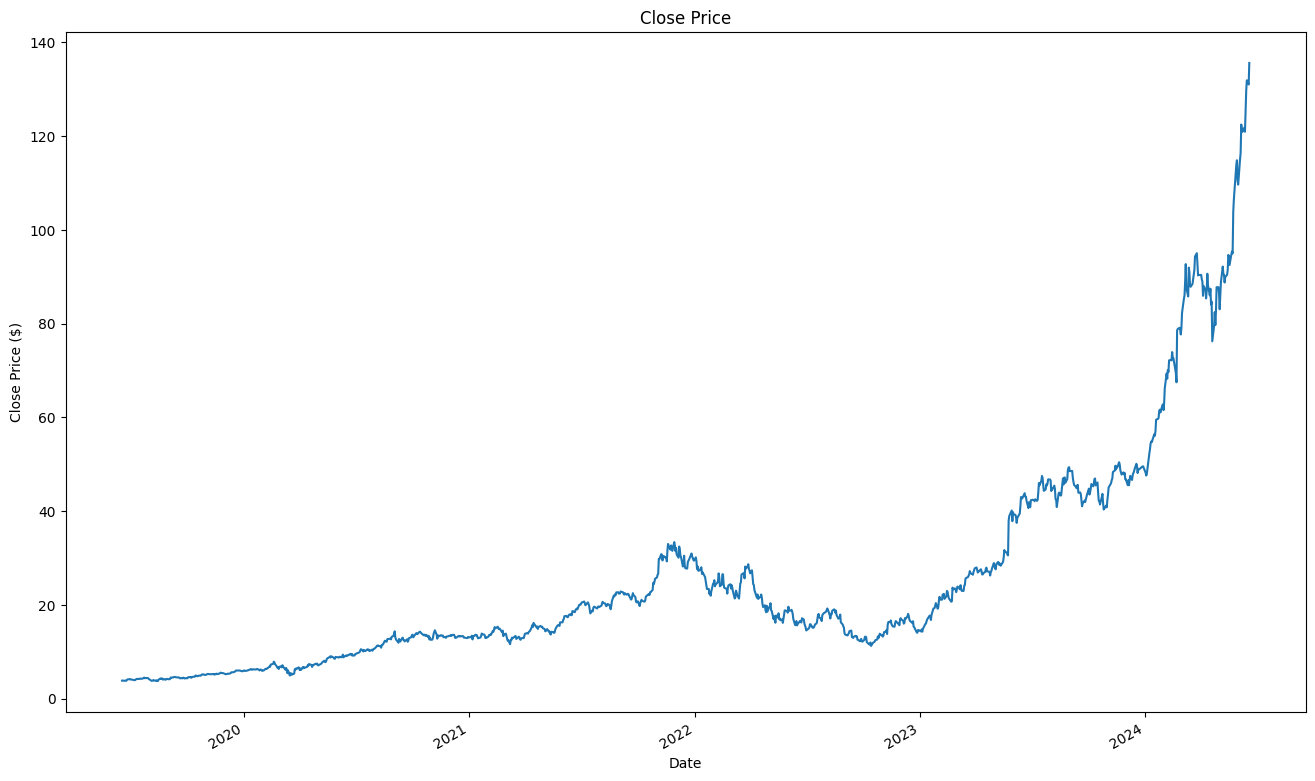

In [85]:

# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stockPrics['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

# Stock News Headlines Data

In [22]:
headlines = headlines.drop_duplicates()
headlines=headlines.filter(['publish_date','headline_text'])
headlines.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [23]:
headlines['publish_date'] = pd.to_datetime(headlines['publish_date'], format='%Y%m%d')
headlines['headline_text'] = headlines.groupby('publish_date').transform(lambda x: ','.join(x))
headlines = headlines.drop_duplicates()
headlines.set_index('publish_date', inplace=True)
headlines.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


# SENITIMENTAL ANALYSIS

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from textblob import TextBlob
model = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
from nltk import sent_tokenize,word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: sent_tokenize(x))

In [33]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: [word_tokenize(sent) for sent in x])

In [34]:
headlines

,headline_text
publish_date,
2001-01-02,"[[Status, quo, will, not, be, disturbed, at, A..."
2001-01-03,"[[Powerless, north, India, gropes, in, the, da..."
2001-01-04,"[[The, string, that, pulled, Stephen, Hawking,..."
2001-01-05,"[[Light, combat, craft, takes, India, into, cl..."
2001-01-06,"[[Light, combat, craft, takes, India, into, cl..."
...,...
2022-03-27,"[[Playing, a, dead, man, in, Body, God, meant,..."
2022-03-28,"[[As, fashion, becomes, democratic, ;, demand,..."
2022-03-29,"[[Bobby, Deol, :, Like, my, dad, ;, I, hope, t..."


In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
stopWord=stopwords.words('english')
stopWord
stop_words = set(stopwords.words('english'))

In [49]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: [[word for word in sent if word not in stop_words] for sent in x])
headlines

,headline_text
publish_date,
2001-01-02,"[[Status, quo, disturbed, Ayodhya, ;, says, Va..."
2001-01-03,"[[Powerless, north, India, gropes, dark, ,, Th..."
2001-01-04,"[[The, string, pulled, Stephen, Hawking, India..."
2001-01-05,"[[Light, combat, craft, takes, India, club, cl..."
2001-01-06,"[[Light, combat, craft, takes, India, club, cl..."
...,...
2022-03-27,"[[Playing, dead, man, Body, God, meant, sittin..."
2022-03-28,"[[As, fashion, becomes, democratic, ;, demand,..."
2022-03-29,"[[Bobby, Deol, :, Like, dad, ;, I, hope, worki..."


In [50]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: [[word for word in sent if word not in punctuation] for sent in x])
headlines

,headline_text
publish_date,
2001-01-02,"[[Status, quo, disturbed, Ayodhya, says, Vajpa..."
2001-01-03,"[[Powerless, north, India, gropes, dark, Think..."
2001-01-04,"[[The, string, pulled, Stephen, Hawking, India..."
2001-01-05,"[[Light, combat, craft, takes, India, club, cl..."
2001-01-06,"[[Light, combat, craft, takes, India, club, cl..."
...,...
2022-03-27,"[[Playing, dead, man, Body, God, meant, sittin..."
2022-03-28,"[[As, fashion, becomes, democratic, demand, st..."
2022-03-29,"[[Bobby, Deol, Like, dad, I, hope, working, I,..."


In [52]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [53]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: [[ps.stem(word) for word in sent ] for sent in x])
headlines

,headline_text
publish_date,
2001-01-02,"[[statu, quo, disturb, ayodhya, say, vajpaye, ..."
2001-01-03,"[[powerless, north, india, grope, dark, think,..."
2001-01-04,"[[the, string, pull, stephen, hawk, india, vaj..."
2001-01-05,"[[light, combat, craft, take, india, club, cla..."
2001-01-06,"[[light, combat, craft, take, india, club, cla..."
...,...
2022-03-27,"[[play, dead, man, bodi, god, meant, sit, refr..."
2022-03-28,"[[as, fashion, becom, democrat, demand, stylis..."
2022-03-29,"[[bobbi, deol, like, dad, i, hope, work, i, ag..."


In [56]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [57]:
headlines['headline_text']=headlines['headline_text'].apply(lambda x: [[wnl.lemmatize(word) for word in sent ] for sent in x])
headlines

,headline_text
publish_date,
2001-01-02,"[[statu, quo, disturb, ayodhya, say, vajpaye, ..."
2001-01-03,"[[powerless, north, india, grope, dark, think,..."
2001-01-04,"[[the, string, pull, stephen, hawk, india, vaj..."
2001-01-05,"[[light, combat, craft, take, india, club, cla..."
2001-01-06,"[[light, combat, craft, take, india, club, cla..."
...,...
2022-03-27,"[[play, dead, man, bodi, god, meant, sit, refr..."
2022-03-28,"[[a, fashion, becom, democrat, demand, stylist..."
2022-03-29,"[[bobbi, deol, like, dad, i, hope, work, i, ag..."


In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sia = SentimentIntensityAnalyzer()


In [60]:
headlines['headline_text'] = headlines['headline_text'].apply(lambda x: ' '.join([' '.join(sent) for sent in x]))
#Measure of how positive or negative or neutral a statement is.
headlines['polarity_score'] = [TextBlob(x).sentiment.polarity for x in headlines['headline_text']]


In [61]:
headlines

,headline_text,polarity_score
publish_date,,
2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.186111
2001-01-03,powerless north india grope dark think laxman ...,0.018182
2001-01-04,the string pull stephen hawk india vajpaye giv...,0.079504
2001-01-05,light combat craft take india club class hawk ...,0.279455
2001-01-06,light combat craft take india club class hawk ...,0.367273
...,...,...
2022-03-27,play dead man bodi god meant sit refriger guru...,0.084305
2022-03-28,a fashion becom democrat demand stylist soar '...,0.083333
2022-03-29,bobbi deol like dad i hope work i age yasha su...,0.093910


In [63]:
#It is a measure of is the statment factual(Objectivity) or it just refer to personal opinion, emotions and judgement(Subjectivity).
headlines['subjectivity_score'] = [TextBlob(x).sentiment.subjectivity for x in headlines['headline_text']]


In [64]:
x = [model.polarity_scores(x)['pos'] for x in headlines['headline_text']]
headlines['positive'] = x
headlines

,headline_text,polarity_score,subjectivity_score,positive
publish_date,,,,
2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.186111,0.323611,0.087
2001-01-03,powerless north india grope dark think laxman ...,0.018182,0.450000,0.111
2001-01-04,the string pull stephen hawk india vajpaye giv...,0.079504,0.467138,0.116
2001-01-05,light combat craft take india club class hawk ...,0.279455,0.418182,0.162
2001-01-06,light combat craft take india club class hawk ...,0.367273,0.410909,0.148
...,...,...,...,...
2022-03-27,play dead man bodi god meant sit refriger guru...,0.084305,0.361315,0.065
2022-03-28,a fashion becom democrat demand stylist soar '...,0.083333,0.382914,0.073
2022-03-29,bobbi deol like dad i hope work i age yasha su...,0.093910,0.369707,0.068


In [65]:
y = [model.polarity_scores(x)['neg'] for x in headlines['headline_text']]
headlines['negative'] = y
headlines

,headline_text,polarity_score,subjectivity_score,positive,negative
publish_date,,,,,
2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.186111,0.323611,0.087,0.150
2001-01-03,powerless north india grope dark think laxman ...,0.018182,0.450000,0.111,0.104
2001-01-04,the string pull stephen hawk india vajpaye giv...,0.079504,0.467138,0.116,0.092
2001-01-05,light combat craft take india club class hawk ...,0.279455,0.418182,0.162,0.141
2001-01-06,light combat craft take india club class hawk ...,0.367273,0.410909,0.148,0.152
...,...,...,...,...,...
2022-03-27,play dead man bodi god meant sit refriger guru...,0.084305,0.361315,0.065,0.142
2022-03-28,a fashion becom democrat demand stylist soar '...,0.083333,0.382914,0.073,0.141
2022-03-29,bobbi deol like dad i hope work i age yasha su...,0.093910,0.369707,0.068,0.126


In [67]:
z = [model.polarity_scores(x)['neu'] for x in headlines['headline_text']]
headlines['neutral'] = z


In [68]:
w = [model.polarity_scores(x)['compound'] for x in headlines['headline_text']]
headlines['compound'] = w


In [86]:
import plotly.graph_objects as go

fig = go.Figure()
#this trace used to smooth out the short term fluctuations and highlight the long term trends for a window of 10
fig.add_trace(go.Scatter(x=stockPrics.index,y=stockPrics['Close'].rolling(window = 10).mean(),
                          name='Average Moving Window(10)',mode='lines'))
fig.add_trace(go.Scatter(x=stockPrics.index,y=stockPrics['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(10)',xaxis_title='Date')
fig.show()

In [72]:
headlines.head()

,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
publish_date,,,,,,,
2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.186111,0.323611,0.087,0.150,0.763,-0.9601
2001-01-03,powerless north india grope dark think laxman ...,0.018182,0.450000,0.111,0.104,0.786,0.1280
2001-01-04,the string pull stephen hawk india vajpaye giv...,0.079504,0.467138,0.116,0.092,0.792,0.9442
2001-01-05,light combat craft take india club class hawk ...,0.279455,0.418182,0.162,0.141,0.697,0.7918
2001-01-06,light combat craft take india club class hawk ...,0.367273,0.410909,0.148,0.152,0.699,-0.3182


In [74]:
headlines = headlines.rename_axis('Date').reset_index()
headlines

,Date,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.186111,0.323611,0.087,0.150,0.763,-0.9601
1,2001-01-03,powerless north india grope dark think laxman ...,0.018182,0.450000,0.111,0.104,0.786,0.1280
2,2001-01-04,the string pull stephen hawk india vajpaye giv...,0.079504,0.467138,0.116,0.092,0.792,0.9442
3,2001-01-05,light combat craft take india club class hawk ...,0.279455,0.418182,0.162,0.141,0.697,0.7918
4,2001-01-06,light combat craft take india club class hawk ...,0.367273,0.410909,0.148,0.152,0.699,-0.3182
...,...,...,...,...,...,...,...,...
7712,2022-03-27,play dead man bodi god meant sit refriger guru...,0.084305,0.361315,0.065,0.142,0.793,-0.9999
7713,2022-03-28,a fashion becom democrat demand stylist soar '...,0.083333,0.382914,0.073,0.141,0.786,-0.9998
7714,2022-03-29,bobbi deol like dad i hope work i age yasha su...,0.093910,0.369707,0.068,0.126,0.806,-0.9997
7715,2022-03-30,i give trend dossmod the time i gave boyfriend...,0.045765,0.335373,0.063,0.134,0.803,-0.9998


In [88]:
stockPrics = stockPrics.rename_axis('Date').reset_index()


In [89]:
stockPrics

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-18,3.687500,3.877750,3.676500,3.822000,3.800063,581920000
1,2019-06-19,3.857500,3.869000,3.801750,3.828000,3.806029,331644000
2,2019-06-20,3.919250,3.933250,3.838000,3.852500,3.830389,350168000
3,2019-06-21,3.837500,3.887000,3.787500,3.794000,3.772225,434428000
4,2019-06-24,3.815500,3.846250,3.768000,3.816500,3.794595,282948000
...,...,...,...,...,...,...,...
1255,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000
1256,2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500
1257,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
1258,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400


In [90]:
df = pd.merge(stockPrics,headlines,on='Date',how='inner')


In [92]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
0,2019-06-18,3.687500,3.877750,3.676500,3.822000,3.800063,581920000,12 foreign arrest overstay bengaluru bengaluru...,0.082789,0.363025,0.084,0.133,0.783,-0.9996
1,2019-06-19,3.857500,3.869000,3.801750,3.828000,3.806029,331644000,dan mahotsav organis raipur dan mahotsav organ...,0.043680,0.367304,0.063,0.149,0.788,-0.9999
2,2019-06-20,3.919250,3.933250,3.838000,3.852500,3.830389,350168000,dmk aiadmk rais tamil nadu 's water crisi all-...,0.068070,0.412400,0.061,0.141,0.798,-0.9999
3,2019-06-21,3.837500,3.887000,3.787500,3.794000,3.772225,434428000,bwssb transfer engin point structur flaw kc va...,0.033458,0.364179,0.071,0.147,0.782,-0.9998
4,2019-06-24,3.815500,3.846250,3.768000,3.816500,3.794595,282948000,home remedi get rid blemish i date someon i st...,0.088446,0.411296,0.078,0.168,0.754,-0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2022-03-25,27.886000,28.358000,27.271000,27.691999,27.654999,579016000,speed shortcut tackl unruli custom what take d...,0.025800,0.375126,0.056,0.142,0.801,-0.9999
700,2022-03-28,27.756001,28.250000,27.205999,28.219000,28.181295,425494000,a fashion becom democrat demand stylist soar '...,0.083333,0.382914,0.073,0.141,0.786,-0.9998
701,2022-03-29,28.695000,28.945999,27.980000,28.656000,28.617716,488984000,bobbi deol like dad i hope work i age yasha su...,0.093910,0.369707,0.068,0.126,0.806,-0.9997
702,2022-03-30,28.304001,28.496000,27.503000,27.690001,27.653006,463487000,i give trend dossmod the time i gave boyfriend...,0.045765,0.335373,0.063,0.134,0.803,-0.9998


In [93]:
stocks_news_df = final_df = df[['Close', 'polarity_score', 'negative', 'neutral',
                                'positive', 'compound', 'subjectivity_score']]

stocks_news_df.head()

,Close,polarity_score,negative,neutral,positive,compound,subjectivity_score
0,3.8220,0.082789,0.133,0.783,0.084,-0.9996,0.363025
1,3.8280,0.043680,0.149,0.788,0.063,-0.9999,0.367304
2,3.8525,0.068070,0.141,0.798,0.061,-0.9999,0.412400
3,3.7940,0.033458,0.147,0.782,0.071,-0.9998,0.364179
4,3.8165,0.088446,0.168,0.754,0.078,-0.9999,0.411296


In [94]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics


In [95]:
# features
X = stocks_news_df.iloc[:,1:].values

# labels
Y = stocks_news_df.iloc[:,0].values

Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [97]:
# preparing training and test dataset
X_train = X[0 : int(704*0.8),]
X_test = X[int(704*0.8)+1 : len(X),]
y_train = Y[0 : int(704*0.8)]
y_test = Y[int(704*0.8)+1 : len(Y)]

In [99]:
y_train

array([ 3.822   ,  3.828   ,  3.8525  ,  3.794   ,  3.8165  ,  3.787   ,
        3.9815  ,  4.08075 ,  4.10575 ,  4.15425 ,  4.05575 ,  4.06875 ,
        4.00575 ,  3.93025 ,  3.93275 ,  4.0015  ,  4.157   ,  4.19025 ,
        4.18175 ,  4.177   ,  4.24275 ,  4.2545  ,  4.211   ,  4.283   ,
        4.3915  ,  4.4665  ,  4.3345  ,  4.37675 ,  4.3705  ,  4.38625 ,
        4.218   ,  4.123   ,  4.02975 ,  3.76975 ,  3.80875 ,  3.84725 ,
        3.9565  ,  3.8545  ,  3.78625 ,  3.90125 ,  3.75175 ,  3.71925 ,
        3.989   ,  4.2695  ,  4.19675 ,  4.28075 ,  4.287   ,  4.061   ,
        4.13625 ,  4.045   ,  4.0305  ,  4.175   ,  4.18775 ,  4.10425 ,
        4.219   ,  4.4935  ,  4.46625 ,  4.5125  ,  4.5795  ,  4.60825 ,
        4.60675 ,  4.5485  ,  4.50525 ,  4.52675 ,  4.4995  ,  4.4235  ,
        4.31725 ,  4.371   ,  4.31325 ,  4.45575 ,  4.4335  ,  4.294   ,
        4.35175 ,  4.35    ,  4.326   ,  4.53275 ,  4.54925 ,  4.60825 ,
        4.43075 ,  4.51775 ,  4.57575 ,  4.64975 , 

In [100]:
clf = tree.DecisionTreeRegressor().fit(X_train,y_train)


In [105]:
r_sq = clf.score(X_train,y_train)
print('coeffiecent of determination: ', r_sq)

coeffiecent of determination:  1.0


In [107]:
pred_y=clf.predict(X_test)


In [109]:
fig = go.Figure()
fig.add_trace(go.Bar(y=y_test, name='Actual Closing Points'))
fig.add_trace(go.Bar(y=pred_y, name='Predicted Closing Points'))
fig.update_layout(title='Comparison between Actual and Predicted Closing')
fig.show()

In [112]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, pred_y))

Mean Absolute Error: 13.306883842857141
